proyek dari sini


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def read_images_from_folder(folder):
    images = []
    labels = []
    for label, class_folder in enumerate(os.listdir(folder)):
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (100, 100))  # Sesuaikan ukuran gambar
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


In [2]:
folder_path = "CLASIFICATION SAMPAH/train/"
images, labels = read_images_from_folder(folder_path)


In [3]:
#Pemisahan data testing dan data training
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)


RandomForestClassifier(random_state=42)

In [5]:
y_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))


In [6]:
#menghitung akurasi 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9791666666666666


In [7]:
def evaluate_model(model, test_folder):
    test_images, test_labels = read_images_from_folder(test_folder)
    test_predictions = model.predict(test_images.reshape(test_images.shape[0], -1))
    
    accuracy = accuracy_score(test_labels, test_predictions)
    print("Test Accuracy:", accuracy)

# Gantilah path sesuai dengan struktur folder di sistem Anda
test_folder_path = "CLASIFICATION SAMPAH/test/"

# Evaluasi model pada data uji
evaluate_model(rf_model, test_folder_path)


Test Accuracy: 0.9333333333333333


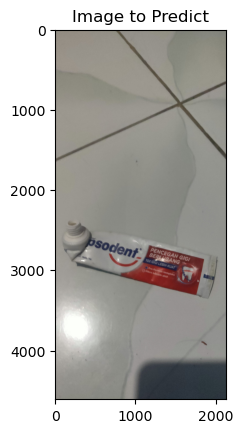

Predicted Category: odol


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np

# Path folder data latihan
train_folder = "D:\\KULIAH\\SEMESTER 5\\TEKCERTAN\\Proyek\\CLASIFICATION SAMPAH\\train"

# Mendapatkan daftar path file gambar di dalam folder
image_paths = glob(os.path.join(train_folder, "*", "*.jpg"))

# Memisahkan path file menjadi features (X) dan labels (y)
features = []
labels = []

for path in image_paths:
    label = os.path.basename(os.path.dirname(path))  # Mengambil nama folder sebagai label
    labels.append(label)

    img = cv2.imread(path)
    img = cv2.resize(img, (100, 100))  # Sesuaikan ukuran gambar
    features.append(img.flatten())

# Konversi ke array numpy
features = np.array(features)
labels = np.array(labels)

# Pisahkan data menjadi data latihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

def predict_image_category(model, image_path):
    # Baca dan preprocessing gambar
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))  # Sesuaikan ukuran gambar
    img = img.flatten().reshape(1, -1)

    # Lakukan prediksi
    prediction = model.predict(img)

    # Tampilkan gambar
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Image to Predict")
    plt.show()

    return prediction[0]

# Gantilah path sesuai dengan lokasi gambar yang ingin Anda uji
image_to_predict_path = "CLASIFICATION SAMPAH/test/odol/81.jpg"

# Melakukan prediksi
predicted_category = predict_image_category(rf_model, image_to_predict_path)

# Mengonversi label prediksi ke kategori yang sesuai
unique_labels, label_counts = np.unique(labels, return_counts=True)
predicted_category_name = unique_labels[np.argmax(label_counts)]

print("Predicted Category:", predicted_category_name)


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

